In [53]:
#Phase 1 - Data Collection and Exploratory Data Analysis (EDA)
#step 1

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data=pd.read_csv("employee_data.csv")

In [56]:
data

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes
...,...,...,...,...,...,...,...,...
95,96,Daniel Allen,29,HR,53000,3,79,No
96,97,Thomas Harris,40,Engineering,91000,13,92,Yes
97,98,Michael Lewis,45,Sales,75000,16,89,No
98,99,Linda Young,50,HR,70000,21,87,Yes


In [57]:
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [58]:
data.nunique()

EmployeeID          100
Name                 98
Age                  28
Department            4
Salary               39
YearsAtCompany       23
PerformanceScore     23
Attrition             2
dtype: int64

In [59]:
data.duplicated().sum()

0

In [60]:
data.isnull().sum()

EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64

In [61]:
#Step 2 - Exploratory Data Analysis (EDA)
data.describe()

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.570000,72820.000000,10.800000,84.940000
std,29.011492,8.318478,12643.823102,6.361183,6.349771
min,1.000000,25.000000,43000.000000,1.000000,70.000000
25%,25.750000,29.750000,65000.000000,5.000000,80.000000
50%,50.500000,35.000000,72000.000000,10.000000,85.500000
75%,75.250000,41.250000,82750.000000,16.000000,90.000000
max,100.000000,60.000000,95000.000000,25.000000,95.000000


In [62]:
numeric_data = data.select_dtypes(include=['int64','float64'])  

In [63]:
corr=numeric_data.corr()

In [64]:
corr

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
EmployeeID,1.000000,-0.023041,0.100207,0.021620,0.151666
Age,-0.023041,1.000000,0.281416,0.946127,0.305288
Salary,0.100207,0.281416,1.000000,0.413361,0.874773
YearsAtCompany,0.021620,0.946127,0.413361,1.000000,0.443331
PerformanceScore,0.151666,0.305288,0.874773,0.443331,1.000000


<Axes: >

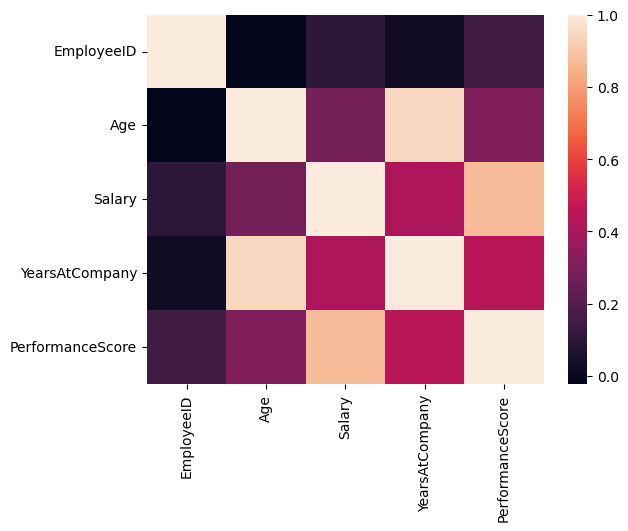

In [65]:
sns.heatmap(corr)

In [66]:
#Step 3 - Probability and Statistical Analysis

In [67]:
data['Attrition']=data['Attrition'].map({'No':0,'Yes':1})#yes:they left,No:working


In [68]:
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,0
1,2,Jane Smith,35,HR,60000,7,85,0
2,3,Michael Brown,40,Engineering,80000,10,95,1
3,4,Emily Davis,28,Marketing,65000,5,78,0
4,5,David Johnson,50,Sales,75000,20,88,1


In [69]:
#Probability - Calculate the probability of an employee leaving based on factors like performance scores and department.
Attrition_prob=data["Attrition"].mean()
print("Probability of attrition:",Attrition_prob)
#based on performance score
Performance_prob=data.groupby("PerformanceScore")["Attrition"].mean()
print("Probability of attrition based on performance score",Performance_prob)
#Based on department
department_prob=data.groupby("Department")["Attrition"].mean()
print("Probability of attrition based on department",department_prob)

Probability of attrition: 0.39
Probability of attrition based on performance score PerformanceScore
70    0.333333
72    0.000000
75    0.500000
76    0.000000
77    0.500000
78    0.600000
79    0.200000
80    0.111111
81    0.666667
82    0.000000
83    0.333333
84    0.500000
85    0.500000
86    0.400000
87    0.750000
88    0.428571
89    0.400000
90    0.200000
91    0.400000
92    0.571429
93    0.666667
94    0.333333
95    0.333333
Name: Attrition, dtype: float64
Probability of attrition based on department Department
Engineering    0.428571
HR             0.346154
Marketing      0.200000
Sales          0.538462
Name: Attrition, dtype: float64


In [70]:
#based on both the factors
joint_prob=data.groupby(["PerformanceScore","Department"])["Attrition"].mean()
print("Probability of attrition based on performance scores and department",joint_prob)


Probability of attrition based on performance scores and department PerformanceScore  Department 
70                HR             0.000000
                  Sales          1.000000
72                HR             0.000000
                  Sales          0.000000
75                Sales          0.500000
76                HR             0.000000
                  Sales          0.000000
77                HR             0.000000
                  Sales          1.000000
78                HR             0.500000
                  Marketing      0.000000
                  Sales          1.000000
79                Engineering    1.000000
                  HR             0.000000
                  Marketing      0.000000
                  Sales          0.000000
80                HR             0.500000
                  Marketing      0.000000
                  Sales          0.000000
81                HR             0.500000
                  Marketing      1.000000
82                HR

In [71]:
joint=pd.DataFrame(joint_prob)

In [72]:
joint

Attrition
PerformanceScore Department            
70               HR            0.000000
                 Sales         1.000000
72               HR            0.000000
                 Sales         0.000000
75               Sales         0.500000
76               HR            0.000000
                 Sales         0.000000
77               HR            0.000000
                 Sales         1.000000
78               HR            0.500000
                 Marketing     0.000000
                 Sales         1.000000
79               Engineering   1.000000
                 HR            0.000000
                 Marketing     0.000000
                 Sales         0.000000
80               HR            0.500000
                 Marketing     0.000000
                 Sales         0.000000
81               HR            0.500000
                 Marketing     1.000000
82               HR            0.000000
                 Marketing     0.000000
                 Sales         0.000000
83               Marketing     0.000000
                 Sales         1.000000
84               HR            0.500000
                 Marketing     0.000000
                 Sales         1.000000
85               HR            0.666667
                 Marketing     0.000000
                 Sales         1.000000
86               Engineering   0.000000
                 HR            0.333333
                 Marketing     1.000000
87               HR            1.000000
                 Marketing     0.666667
88               Engineering   0.000000
                 HR            0.500000
                 Marketing     0.000000
                 Sales         0.666667
89               HR            0.000000
                 Marketing     0.000000
                 Sales         0.666667
90               Engineering   0.000000
                 Sales         0.333333
91               Engineering   0.250000
                 Sales         1.000000
92               Engineering   0.571429
93               Engineering   0.666667
94               Engineering   0.333333
95               Engineering   0.333333

PerformanceScore = 70, HR = 0.0
None of the HR employees with score 70 left.
PerformanceScore = 70, Sales = 1.0
Every Sales employee with score 70 left.
PerformanceScore = 85, HR = 0.667
66% HR employees with score 85 left.
PerformanceScore = 91, Engineering = 0.25
25% of Engineering employees with score 91 left .

In [74]:
#Bayes theorem

In [75]:
#Bayes' Theorem - Use Bayes' Theorem to find the probability of employee attrition given performance score.

def bayes_attrition_given_perf(score):
       
    # P(Perf=score | Attrition=Yes)
    p_perf_given_attrition = (
        len(data[(data["PerformanceScore"] == score) & (data["Attrition"] == 1)]) /
        len(data[data["Attrition"] == 1])
    )
    
    p_perf = (data["PerformanceScore"] == score).mean()
    
    # Bayes' theorem
    p_attrition_given_perf = (p_perf_given_attrition * Attrition_prob) / p_perf
    return p_attrition_given_perf

# let us take probability of attrition given Performance Score =70
prob_score = bayes_attrition_given_perf(70)
print("P(Attrition=Yes | Perf=70):",prob_score)



P(Attrition=Yes | Perf=70): 0.33333333333333337


In [76]:
from scipy.stats import f_oneway
# Step 1: Split performance scores by department
groups = [data.loc[data["Department"] == dept, "PerformanceScore"] for dept in data["Department"].unique()]

f_stat, p_value = f_oneway(*groups)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)

alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject H0: There IS a significant difference in mean performance scores across departments.")
else:
    print("Fail to reject H0: No significant difference in mean performance scores across departments.")


ANOVA F-statistic: 25.781068086646336
p-value: 2.5591493445552222e-12
Reject H0: There IS a significant difference in mean performance scores across departments.


Phase 2 - Predictive Modeling

In [78]:
#Step 4 - Feature Engineering and Encoding
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,0
1,2,Jane Smith,35,HR,60000,7,85,0
2,3,Michael Brown,40,Engineering,80000,10,95,1
3,4,Emily Davis,28,Marketing,65000,5,78,0
4,5,David Johnson,50,Sales,75000,20,88,1


In [79]:
#Scale numerical features such as Salary and Performance Scores using Min-Max Scaling or Standardization.
x=data.iloc[:,[4,6]].values
print("Original values:\n",x)

Original values:
 [[55000    80]
 [60000    85]
 [80000    95]
 [65000    78]
 [75000    88]
 [45000    70]
 [95000    92]
 [70000    82]
 [77000    84]
 [85000    90]
 [62000    70]
 [53000    75]
 [71000    87]
 [70000    80]
 [80000    95]
 [56000    79]
 [82000    91]
 [75000    85]
 [43000    72]
 [79000    83]
 [87000    86]
 [65000    80]
 [76000    88]
 [69000    89]
 [92000    93]
 [72000    80]
 [55000    77]
 [77000    85]
 [88000    92]
 [71000    84]
 [80000    90]
 [63000    78]
 [82000    79]
 [85000    88]
 [67000    80]
 [73000    85]
 [91000    94]
 [70000    86]
 [69000    81]
 [54000    75]
 [86000    93]
 [67000    88]
 [69000    79]
 [81000    90]
 [94000    94]
 [73000    83]
 [75000    86]
 [68000    82]
 [91000    91]
 [65000    80]
 [53000    70]
 [68000    88]
 [87000    92]
 [76000    89]
 [63000    76]
 [48000    72]
 [88000    93]
 [72000    83]
 [60000    80]
 [93000    95]
 [50000    78]
 [67000    82]
 [74000    87]
 [85000    91]
 [76000    90]
 [71000

In [80]:
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
x_after_min_max_scaler=min_max_scaler.fit_transform(x)
print("After min max scaler:\n",x_after_min_max_scaler)

After min max scaler:
 [[0.23076923 0.4       ]
 [0.32692308 0.6       ]
 [0.71153846 1.        ]
 [0.42307692 0.32      ]
 [0.61538462 0.72      ]
 [0.03846154 0.        ]
 [1.         0.88      ]
 [0.51923077 0.48      ]
 [0.65384615 0.56      ]
 [0.80769231 0.8       ]
 [0.36538462 0.        ]
 [0.19230769 0.2       ]
 [0.53846154 0.68      ]
 [0.51923077 0.4       ]
 [0.71153846 1.        ]
 [0.25       0.36      ]
 [0.75       0.84      ]
 [0.61538462 0.6       ]
 [0.         0.08      ]
 [0.69230769 0.52      ]
 [0.84615385 0.64      ]
 [0.42307692 0.4       ]
 [0.63461538 0.72      ]
 [0.5        0.76      ]
 [0.94230769 0.92      ]
 [0.55769231 0.4       ]
 [0.23076923 0.28      ]
 [0.65384615 0.6       ]
 [0.86538462 0.88      ]
 [0.53846154 0.56      ]
 [0.71153846 0.8       ]
 [0.38461538 0.32      ]
 [0.75       0.36      ]
 [0.80769231 0.72      ]
 [0.46153846 0.4       ]
 [0.57692308 0.6       ]
 [0.92307692 0.96      ]
 [0.51923077 0.64      ]
 [0.5        0.44      ]
 [

In [81]:
#standardization
standardization=preprocessing.StandardScaler()
x_after_standardization=standardization.fit_transform(x)
print("After Standardization:\n",x_after_standardization)

After Standardization:
 [[-1.41648406 -0.7819001 ]
 [-1.01904184  0.00949676]
 [ 0.57072702  1.59229048]
 [-0.62159963 -1.09845884]
 [ 0.17328481  0.48433488]
 [-2.21136849 -2.36469381]
 [ 1.76305367  1.11745236]
 [-0.22415741 -0.46534135]
 [ 0.33226169 -0.14878261]
 [ 0.96816924  0.80089362]
 [-0.86006496 -2.36469381]
 [-1.57546095 -1.57329695]
 [-0.14466897  0.32605551]
 [-0.22415741 -0.7819001 ]
 [ 0.57072702  1.59229048]
 [-1.33699562 -0.94017947]
 [ 0.72970391  0.95917299]
 [ 0.17328481  0.00949676]
 [-2.37034538 -2.04813507]
 [ 0.49123858 -0.30706198]
 [ 1.12714613  0.16777613]
 [-0.62159963 -0.7819001 ]
 [ 0.25277325  0.48433488]
 [-0.30364585  0.64261425]
 [ 1.52458834  1.27573173]
 [-0.06518052 -0.7819001 ]
 [-1.41648406 -1.25673821]
 [ 0.33226169  0.00949676]
 [ 1.20663457  1.11745236]
 [-0.14466897 -0.14878261]
 [ 0.57072702  0.80089362]
 [-0.78057651 -1.09845884]
 [ 0.72970391 -0.94017947]
 [ 0.96816924  0.48433488]
 [-0.46262274 -0.7819001 ]
 [ 0.01430792  0.00949676]
 [ 1

In [82]:
#Apply Label Encoding to categorical features (e.g., Attrition, Department).
data["Department"].unique()

array(['Sales', 'HR', 'Engineering', 'Marketing'], dtype=object)

In [83]:
data["Attrition"].unique()

array([0, 1], dtype=int64)

In [84]:
#label encoding
from sklearn import preprocessing
label_Encoder=preprocessing.LabelEncoder()
data["Department"]=label_Encoder.fit_transform(data["Department"])

In [85]:
data["Department"].unique()

array([3, 1, 0, 2])

In [86]:
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,3,55000,3,80,0
1,2,Jane Smith,35,1,60000,7,85,0
2,3,Michael Brown,40,0,80000,10,95,1
3,4,Emily Davis,28,2,65000,5,78,0
4,5,David Johnson,50,3,75000,20,88,1


In [87]:
#Step 5 - Employee Attrition Prediction Model
#Objective - Build a machine learning model to predict employee attrition (i.e., whether an employee will leave or stay).

In [88]:
data.drop(columns=["EmployeeID","Name"],axis=1,inplace=True)#drop unnecessary column

In [89]:
data

,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,29,3,55000,3,80,0
1,35,1,60000,7,85,0
2,40,0,80000,10,95,1
3,28,2,65000,5,78,0
4,50,3,75000,20,88,1
...,...,...,...,...,...,...
95,29,1,53000,3,79,0
96,40,0,91000,13,92,1
97,45,3,75000,16,89,0
98,50,1,70000,21,87,1


In [90]:
# Features (X) and Target (y)
x = data.drop("Attrition", axis=1)
y = data["Attrition"]

In [243]:
# train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)                                              

In [245]:
data.shape

(100, 6)

In [247]:
x_train.shape

(70, 5)

In [249]:
x_test.shape

(30, 5)

In [251]:
y_train.shape

(70,)

In [253]:
y_test.shape

(30,)

In [255]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [257]:
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [259]:
x_train

array([[-0.71719769, -0.3916443 , -1.48379058, -0.36130182, -1.26845887],
       [-0.00339904, -0.3916443 , -0.8190524 , -0.04712632, -1.10613324],
       [-0.71719769, -1.24836622,  1.0089776 , -0.20421407,  1.00409998],
       [-1.19306346,  0.46507761, -0.32049877, -1.30382831, -0.78148197],
       [-0.95513058, -0.3916443 , -0.8190524 , -0.51838957, -0.13217944],
       [ 0.23453384,  0.46507761, -0.07122195,  0.42413692, -0.78148197],
       [-0.59823125,  0.46507761, -0.23740649, -0.83256507, -0.45683071],
       [ 0.23453384,  1.32179953, -0.40359104,  0.73831242,  0.67944872],
       [-0.24133193, -1.24836622,  1.67371578,  0.58122467,  1.32875125],
       [ 0.1155674 , -1.24836622,  1.75680805,  0.10996142,  1.49107688],
       [ 1.90006403, -0.3916443 ,  0.01187032,  1.52375116,  0.03014619],
       [-0.83616413,  0.46507761, -0.07122195, -1.14674057, -0.29450508],
       [-1.43099634, -1.24836622,  0.75970078, -1.46091606, -0.94380761],
       [ 0.47246673,  0.46507761,  0.1

In [261]:
x_test

array([[-0.95365527,  1.43684242, -1.21525771, -0.9257113 , -0.93569033],
       [ 1.84373351, -0.3592106 , -0.56163305,  2.03218278, -0.48535808],
       [ 0.31788509, -1.25723711,  1.61711584,  0.3889083 ,  1.01574939],
       [ 1.84373351,  1.43684242,  0.23724155,  1.53920044,  0.4153064 ],
       [ 0.95365527, -0.3592106 , -0.41638312,  1.21054554, -0.03502584],
       [-0.19073105,  0.53881591, -0.12588327, -0.2684015 ,  0.26519565],
       [ 0.82650123, -1.25723711,  1.32661599,  0.88189064,  0.86563864],
       [-0.82650123,  0.53881591, -0.41638312, -0.76138385, -0.78557958],
       [-0.57219316, -1.25723711,  1.32661599, -0.2684015 ,  1.31597089],
       [-0.6993472 ,  1.43684242, -0.77950794, -0.9257113 , -0.78557958],
       [-0.44503912, -1.25723711,  0.96349117, -0.43272895,  1.16586014],
       [-0.31788509, -1.25723711,  1.03611614, -0.10407405,  0.7155279 ],
       [ 1.84373351,  1.43684242,  0.5277414 ,  1.70352789,  0.86563864],
       [-1.0808093 ,  1.43684242, -1.4

In [263]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [265]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [267]:
y_pred=rfc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))


Accuracy: 0.6666666666666666
Precision: 0.45454545454545453
Recall   : 0.5555555555555556
F1-score : 0.5


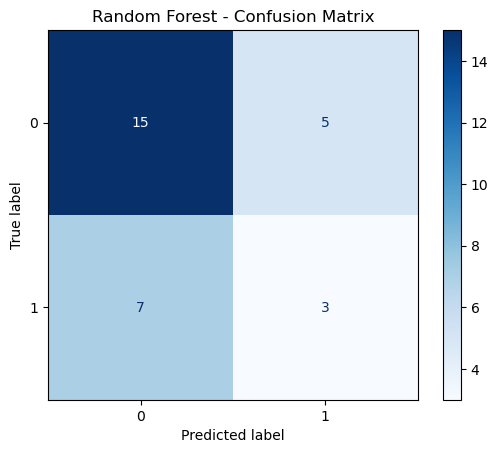

In [241]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()

In [105]:
# our model is good at predicting who will stay in the company than who will leave

In [106]:
#Step 6 - Employee Performance Prediction Model

In [107]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
x=data.drop("PerformanceScore",axis=1)
y=data["PerformanceScore"]

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [110]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)


LinearRegression()

In [111]:
y_pred = linreg.predict(x_test)

In [112]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [113]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 10.467492198532325
R-squared (R²): 0.7928414333125364


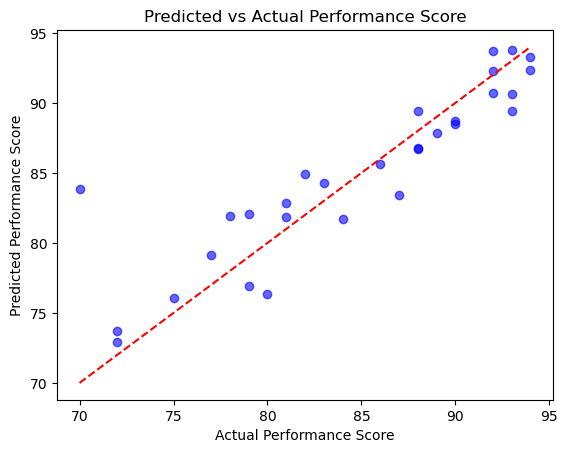

In [114]:
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Predicted vs Actual Performance Score")
plt.show()

Phase 3 - Deep Learning Models

D:\Users\Arya\anacindadatascience\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 64094992.0000 - mae: 7521.2163 - val_loss: 6785729.0000 - val_mae: 2557.6807
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2609726.0000 - mae: 1393.0260 - val_loss: 6398257.5000 - val_mae: 2479.7104
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6648536.5000 - mae: 2533.7717 - val_loss: 3243419.5000 - val_mae: 1764.9333
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1034398.8750 - mae: 798.0678 - val_loss: 252856.1719 - val_mae: 495.2081
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 702767.5625 - mae: 817.7542 - val_loss: 723443.6250 - val_mae: 836.3913
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 293222.6250 - mae: 478.4253 - val_loss: 929.6731 - val_mae: 26.5779
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 75783.1250 - mae: 245.7972 - val_loss: 117105.1250 - val_mae: 333.6156
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 51748.2812 - mae: 197.8315 - va

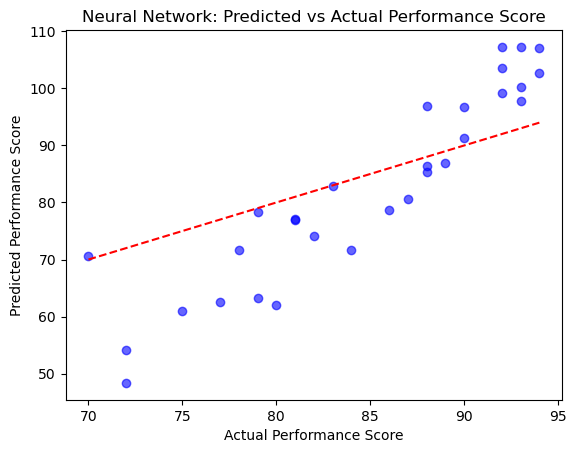

In [ ]:
#Step 7 - Deep Learning for Employee Performance Prediction
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # Input + 1st hidden
    Dense(32, activation='relu'),                                   # 2nd hidden layer
    Dense(1, activation='linear')                                   # Output layer for regression
])

#Compile Model

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']   
)

# Train Model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=8,
    verbose=1
)

#Evaluate Model

loss, mae = model.evaluate(x_test, y_test, verbose=0)
print("Test Mean Squared Error (MSE):", loss)
print("Test Mean Absolute Error (MAE):", mae)

# Predictions

y_pred = model.predict(x_test)

# Visualization
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Neural Network: Predicted vs Actual Performance Score")
plt.show()


In [117]:
#Step 8 - Employee Attrition Analysis with Deep Learning
#Objective - Use deep learning for classification to predict employee attrition based on various features.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
x=data.drop("Attrition",axis=1)
y=data["Attrition"]


In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [119]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [120]:
#build neural network
model=Sequential([Dense(32,activation='relu',input_shape=(x_train.shape[1],)),Dense(16,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

D:\Users\Arya\anacindadatascience\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [121]:
history = model.fit(x_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5179 - loss: 0.7309 - val_accuracy: 0.6429 - val_loss: 0.6743
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5179 - loss: 0.7118 - val_accuracy: 0.6429 - val_loss: 0.6701
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5536 - loss: 0.6951 - val_accuracy: 0.6429 - val_loss: 0.6676
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5893 - loss: 0.6844 - val_accuracy: 0.6429 - val_loss: 0.6649
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6071 - loss: 0.6730 - val_accuracy: 0.6429 - val_loss: 0.6617
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6786 - loss: 0.6611 - val_accuracy: 0.6429 - val_loss: 0.6598
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7143 - loss: 0.6526 - val_accuracy: 0.6429 - val_loss: 0.6584
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7143 - loss: 0.6452 - val_accuracy: 0.6429 - val_loss: 0.6560


In [122]:
# Predictions (probabilities)
y_pred_prob = model.predict(x_test)
# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average="weighted"))
print("Recall   :", recall_score(y_test, y_pred,average="weighted"))
print("F1-score :", f1_score(y_test, y_pred,average="weighted"))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Accuracy : 0.5666666666666667
Precision: 0.5300207039337475
Recall   : 0.5666666666666667
F1-score : 0.543547651618787

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.75      0.70        20
           1       0.29      0.20      0.24        10

    accuracy                           0.57        30
   macro avg       0.47      0.47      0.47        30
weighted avg       0.53      0.57      0.54        30


Confusion Matrix:
 [[15  5]
 [ 8  2]]


Phase 4 - Reporting and Insights

#Step 9 - Insights and Recommendations
#Summarize key findings, such as:
Key factors contributing to employee performance.
High-risk departments or employee groups for attrition.


#### Salary and Years at Company show a positive relationship with performance (employees with more experience and higher salaries tend to perform better).

#### Performance trends indicate that employees who stay longer tend to stabilize at higher performance levels.

#### Departments differ in performance – e.g., Engineering roles often show higher performance scores compared to Sales/HR.

Recommend strategies to improve retention, such as:
Department-wise performance improvement plans.
Targeted employee engagement programs.


#### Sales & Marketing departments show higher attrition rates compared to other departments.

#### Employees with mid-level performance scores (not top nor bottom performers) are more likely to leave, suggesting lack of motivation or recognition.


#Step 10 - Data Visualization and Reporting
Generate interactive data visualizations such as:
Line Plots to show performance trends.
Bar Charts for department-wise attrition.
Scatter Plots for salary vs. performance.


In [129]:
data.head()

,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,29,3,55000,3,80,0
1,35,1,60000,7,85,0
2,40,0,80000,10,95,1
3,28,2,65000,5,78,0
4,50,3,75000,20,88,1


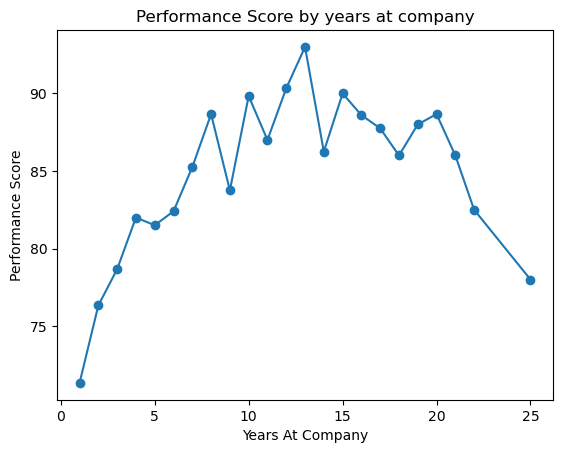

In [130]:
# line plot
perf_trends=data.groupby("YearsAtCompany")["PerformanceScore"].mean()
plt.plot(perf_trends.index,perf_trends.values,marker="o")
plt.title("Performance Score by years at company")
plt.xlabel("Years At Company")
plt.ylabel("Performance Score")
plt.show()

In [131]:
perf_trends

YearsAtCompany
1     71.333333
2     76.333333
3     78.666667
4     82.000000
5     81.500000
6     82.400000
7     85.250000
8     88.666667
9     83.750000
10    89.833333
11    87.000000
12    90.333333
13    93.000000
14    86.250000
15    90.000000
16    88.600000
17    87.750000
18    86.000000
19    88.000000
20    88.666667
21    86.000000
22    82.500000
25    78.000000
Name: PerformanceScore, dtype: float64

In [132]:
#bar chart 
dept_attrition=data.groupby("Department")["Attrition"].sum()

In [133]:
dept_attrition

Department
0    12
1     9
2     4
3    14
Name: Attrition, dtype: int64

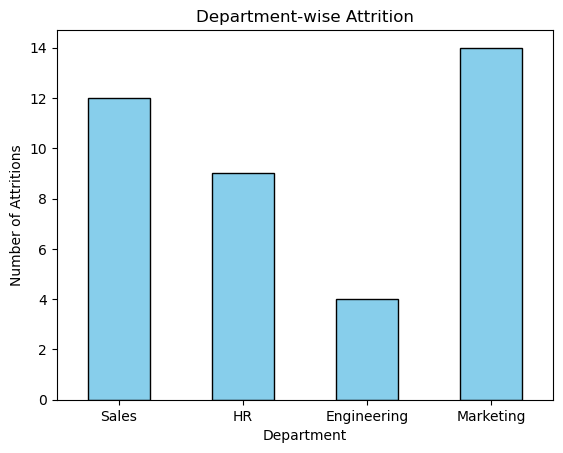

In [134]:
dept_attrition.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Department-wise Attrition")
plt.xlabel("Department")
plt.ylabel("Number of Attritions")
plt.xticks(rotation=0)
mapping={0:'Sales', 1:'HR',2:'Engineering',3:'Marketing'}
plt.xticks(list(mapping.keys()),list(mapping.values()))
plt.show()


Engineering and Hr department has low attrition rate compared to sales and marketing

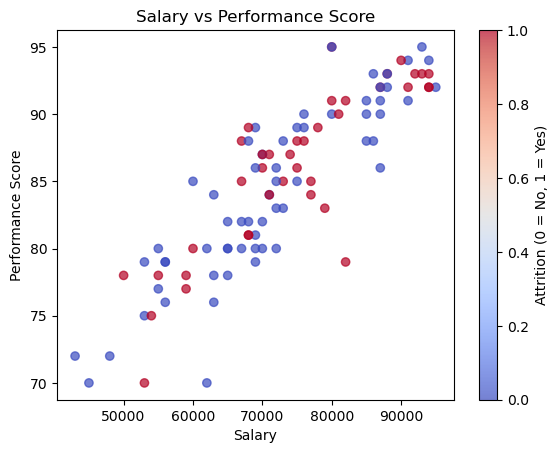

In [136]:
plt.scatter(data["Salary"], data["PerformanceScore"], alpha=0.7, c=data["Attrition"], cmap="coolwarm")
plt.title("Salary vs Performance Score")
plt.xlabel("Salary")
plt.ylabel("Performance Score")
plt.colorbar(label="Attrition (0 = No, 1 = Yes)")
plt.show()

as salary increases performance score also increases